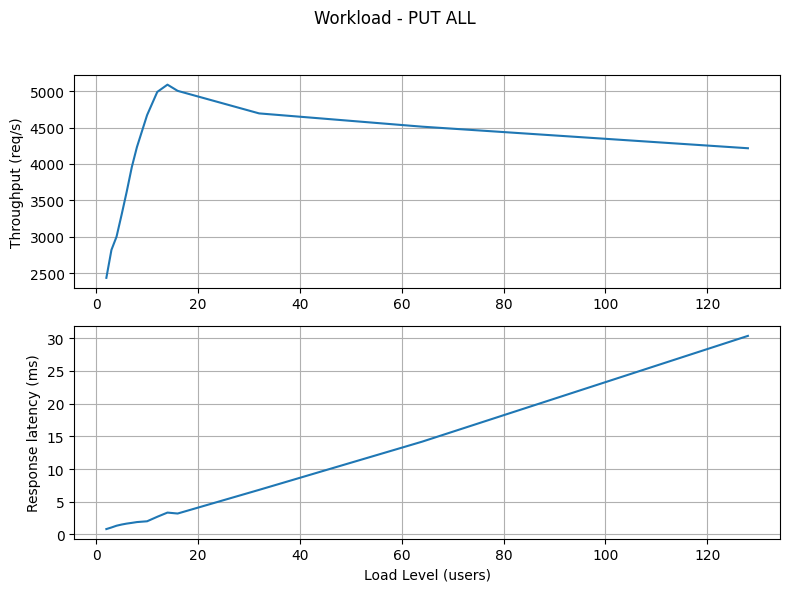

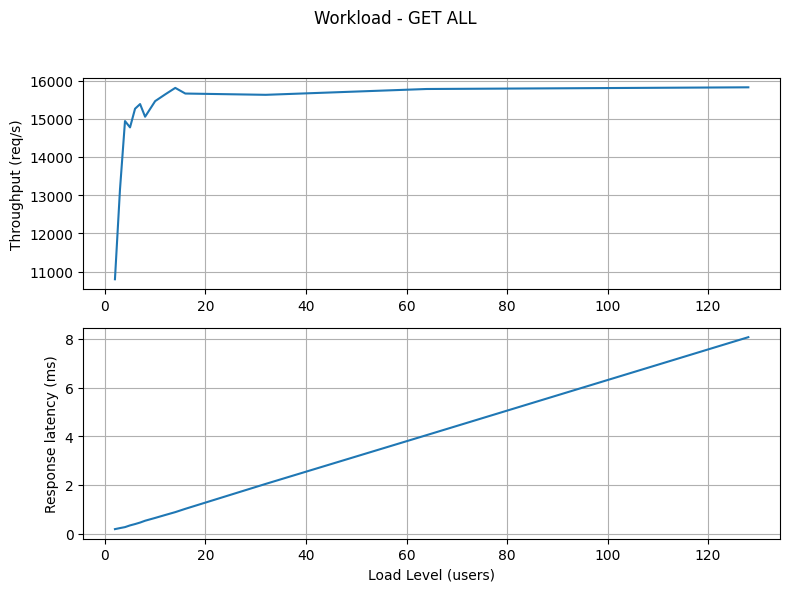

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "../results/data.xlsx"

# Sheets to process
sheets = ["put_workaround_10k", "get_workaround_10k"]

# Title mapping
title_map = {
    "put_workaround_10k": "Workload - PUT ALL",
    "get_workaround_10k": "Workload - GET ALL"
}

for sheet in sheets:
    # Read the sheet
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Extract required columns
    load_levels = df[df.columns[0]]  # assumes first column is load/users
    throughput = df["Throughput (req/s)"]
    latency = df["Avg latency (ms)"]

    # Create plot (2 stacked subplots)
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    fig.suptitle(title_map.get(sheet, sheet))

    # Plot throughput (line only)
    ax[0].plot(load_levels, throughput)
    ax[0].set_ylabel("Throughput (req/s)")

    # Plot latency (line only)
    ax[1].plot(load_levels, latency)
    ax[1].set_ylabel("Response latency (ms)")
    ax[1].set_xlabel("Load Level (users)")

    # Show grid for readability
    for a in ax:
        a.grid(True)

    # Display the figure
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## Do not use!

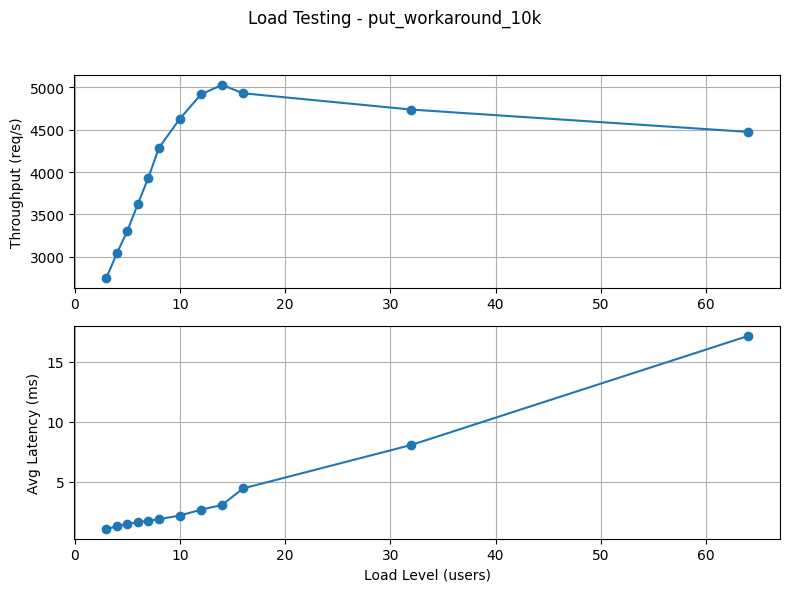

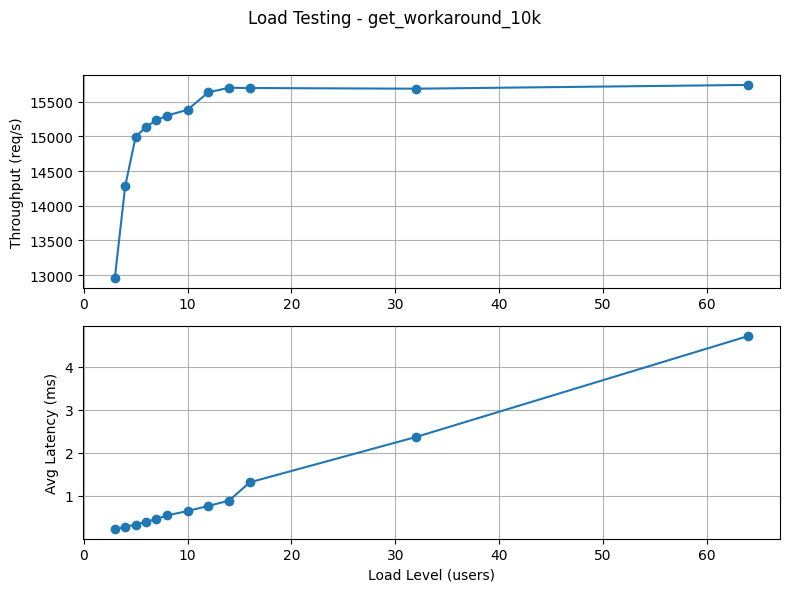

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "../results/data.xlsx"

# Sheets to process
sheets = ["put_workaround_10k", "get_workaround_10k"]

# Smoothing window (tune this: 3, 5, or 7 depending how smooth you want)
smooth_window = 3

for sheet in sheets:
    # Read the sheet
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Extract required columns
    load_levels = df[df.columns[0]]  # assumes first column is load/users
    throughput = df["Throughput (req/s)"].rolling(window=smooth_window, center=True).mean()
    latency = df["Avg latency (ms)"].rolling(window=smooth_window, center=True).mean()

    # Create plot (2 stacked subplots)
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    fig.suptitle(f"Load Testing - {sheet}")

    # Plot (with markers so we still see actual data points)
    ax[0].plot(load_levels, throughput, marker="o")
    ax[0].set_ylabel("Throughput (req/s)")

    ax[1].plot(load_levels, latency, marker="o")
    ax[1].set_ylabel("Avg Latency (ms)")
    ax[1].set_xlabel("Load Level (users)")

    # Grid for readability
    for a in ax:
        a.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## % Utilization

In [35]:
disk_usage

(87.84,
 94.5,
 96.62,
 96.91,
 96.96,
 96.89,
 96.8,
 96.04,
 95.98,
 95.81,
 95.89,
 96.27,
 96.24,
 96.23)

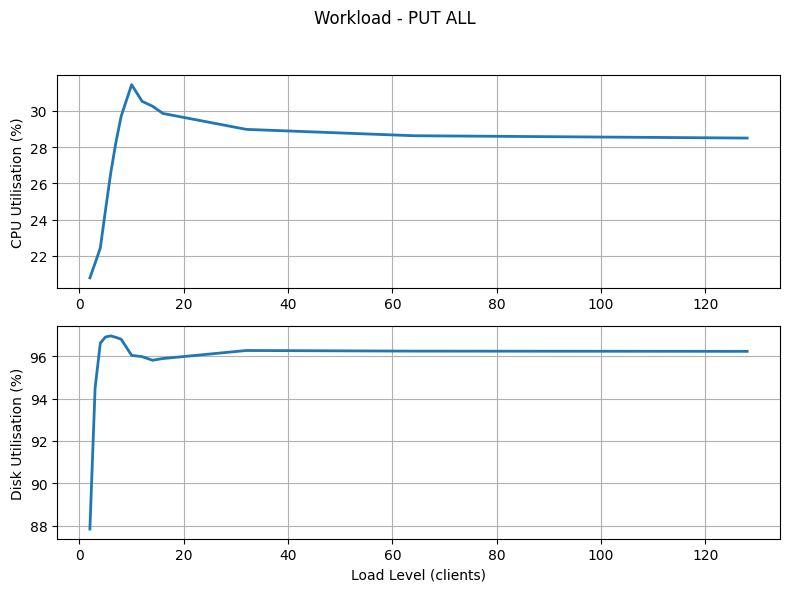

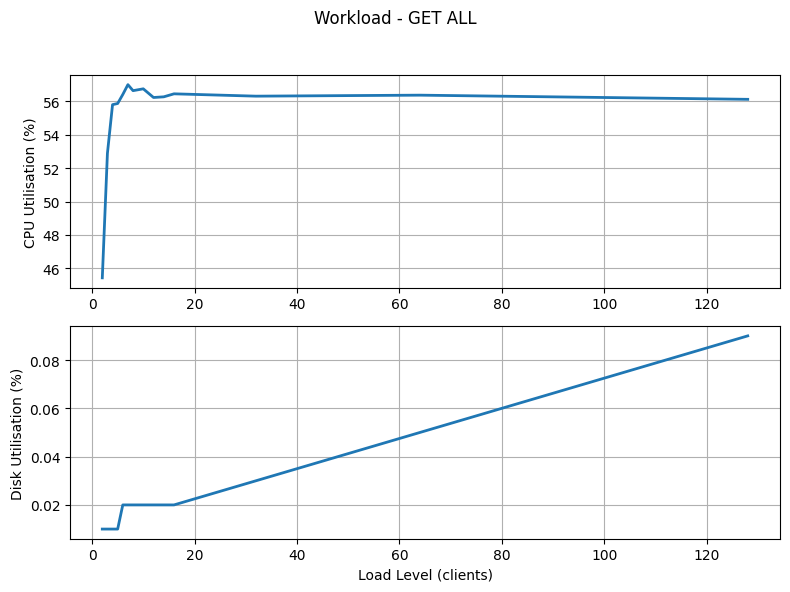

In [36]:
import os
import re
import matplotlib.pyplot as plt

files = {
    "../results/put_cpu_disk_util.txt": "Workload - PUT ALL",
    "../results/get_cpu_disk_util.txt": "Workload - GET ALL"
}

pattern = re.compile(
    r"clients=(\d+).*?core1_user_pct=([\d.]+).*?disk_util_pct=([\d.]+)",
    re.DOTALL
)

for filepath, title in files.items():

    if not os.path.exists(filepath):
        print(f"❌ File missing: {filepath}")
        continue

    with open(filepath, "r") as f:
        text = f.read()

    clients, cpu_usage, disk_usage = [], [], []

    for match in pattern.finditer(text):
        clients.append(int(match.group(1)))
        cpu_usage.append(float(match.group(2)))
        disk_usage.append(float(match.group(3)))

    # Sort by number of clients to ensure line order is correct
    clients, cpu_usage, disk_usage = zip(*sorted(zip(clients, cpu_usage, disk_usage)))

    # Create stacked subplot layout
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    fig.suptitle(title)

    # --- CPU Utilisation Plot ---
    ax[0].plot(clients, cpu_usage, linewidth=2, label="CPU Utilisation (%)")
    ax[0].set_ylabel("CPU Utilisation (%)")
    ax[0].grid(True)

    # --- Disk Utilisation Plot ---
    ax[1].plot(clients, disk_usage, linewidth=2, label="Disk Utilisation (%)")
    ax[1].set_ylabel("Disk Utilisation (%)")
    ax[1].set_xlabel("Load Level (clients)")
    ax[1].grid(True)

    # Fix spacing so title doesn't overlap graphics
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
